# V.1 Exploring the green reds
### a) function that plot scatterplot matrix of red wine data

In [339]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random

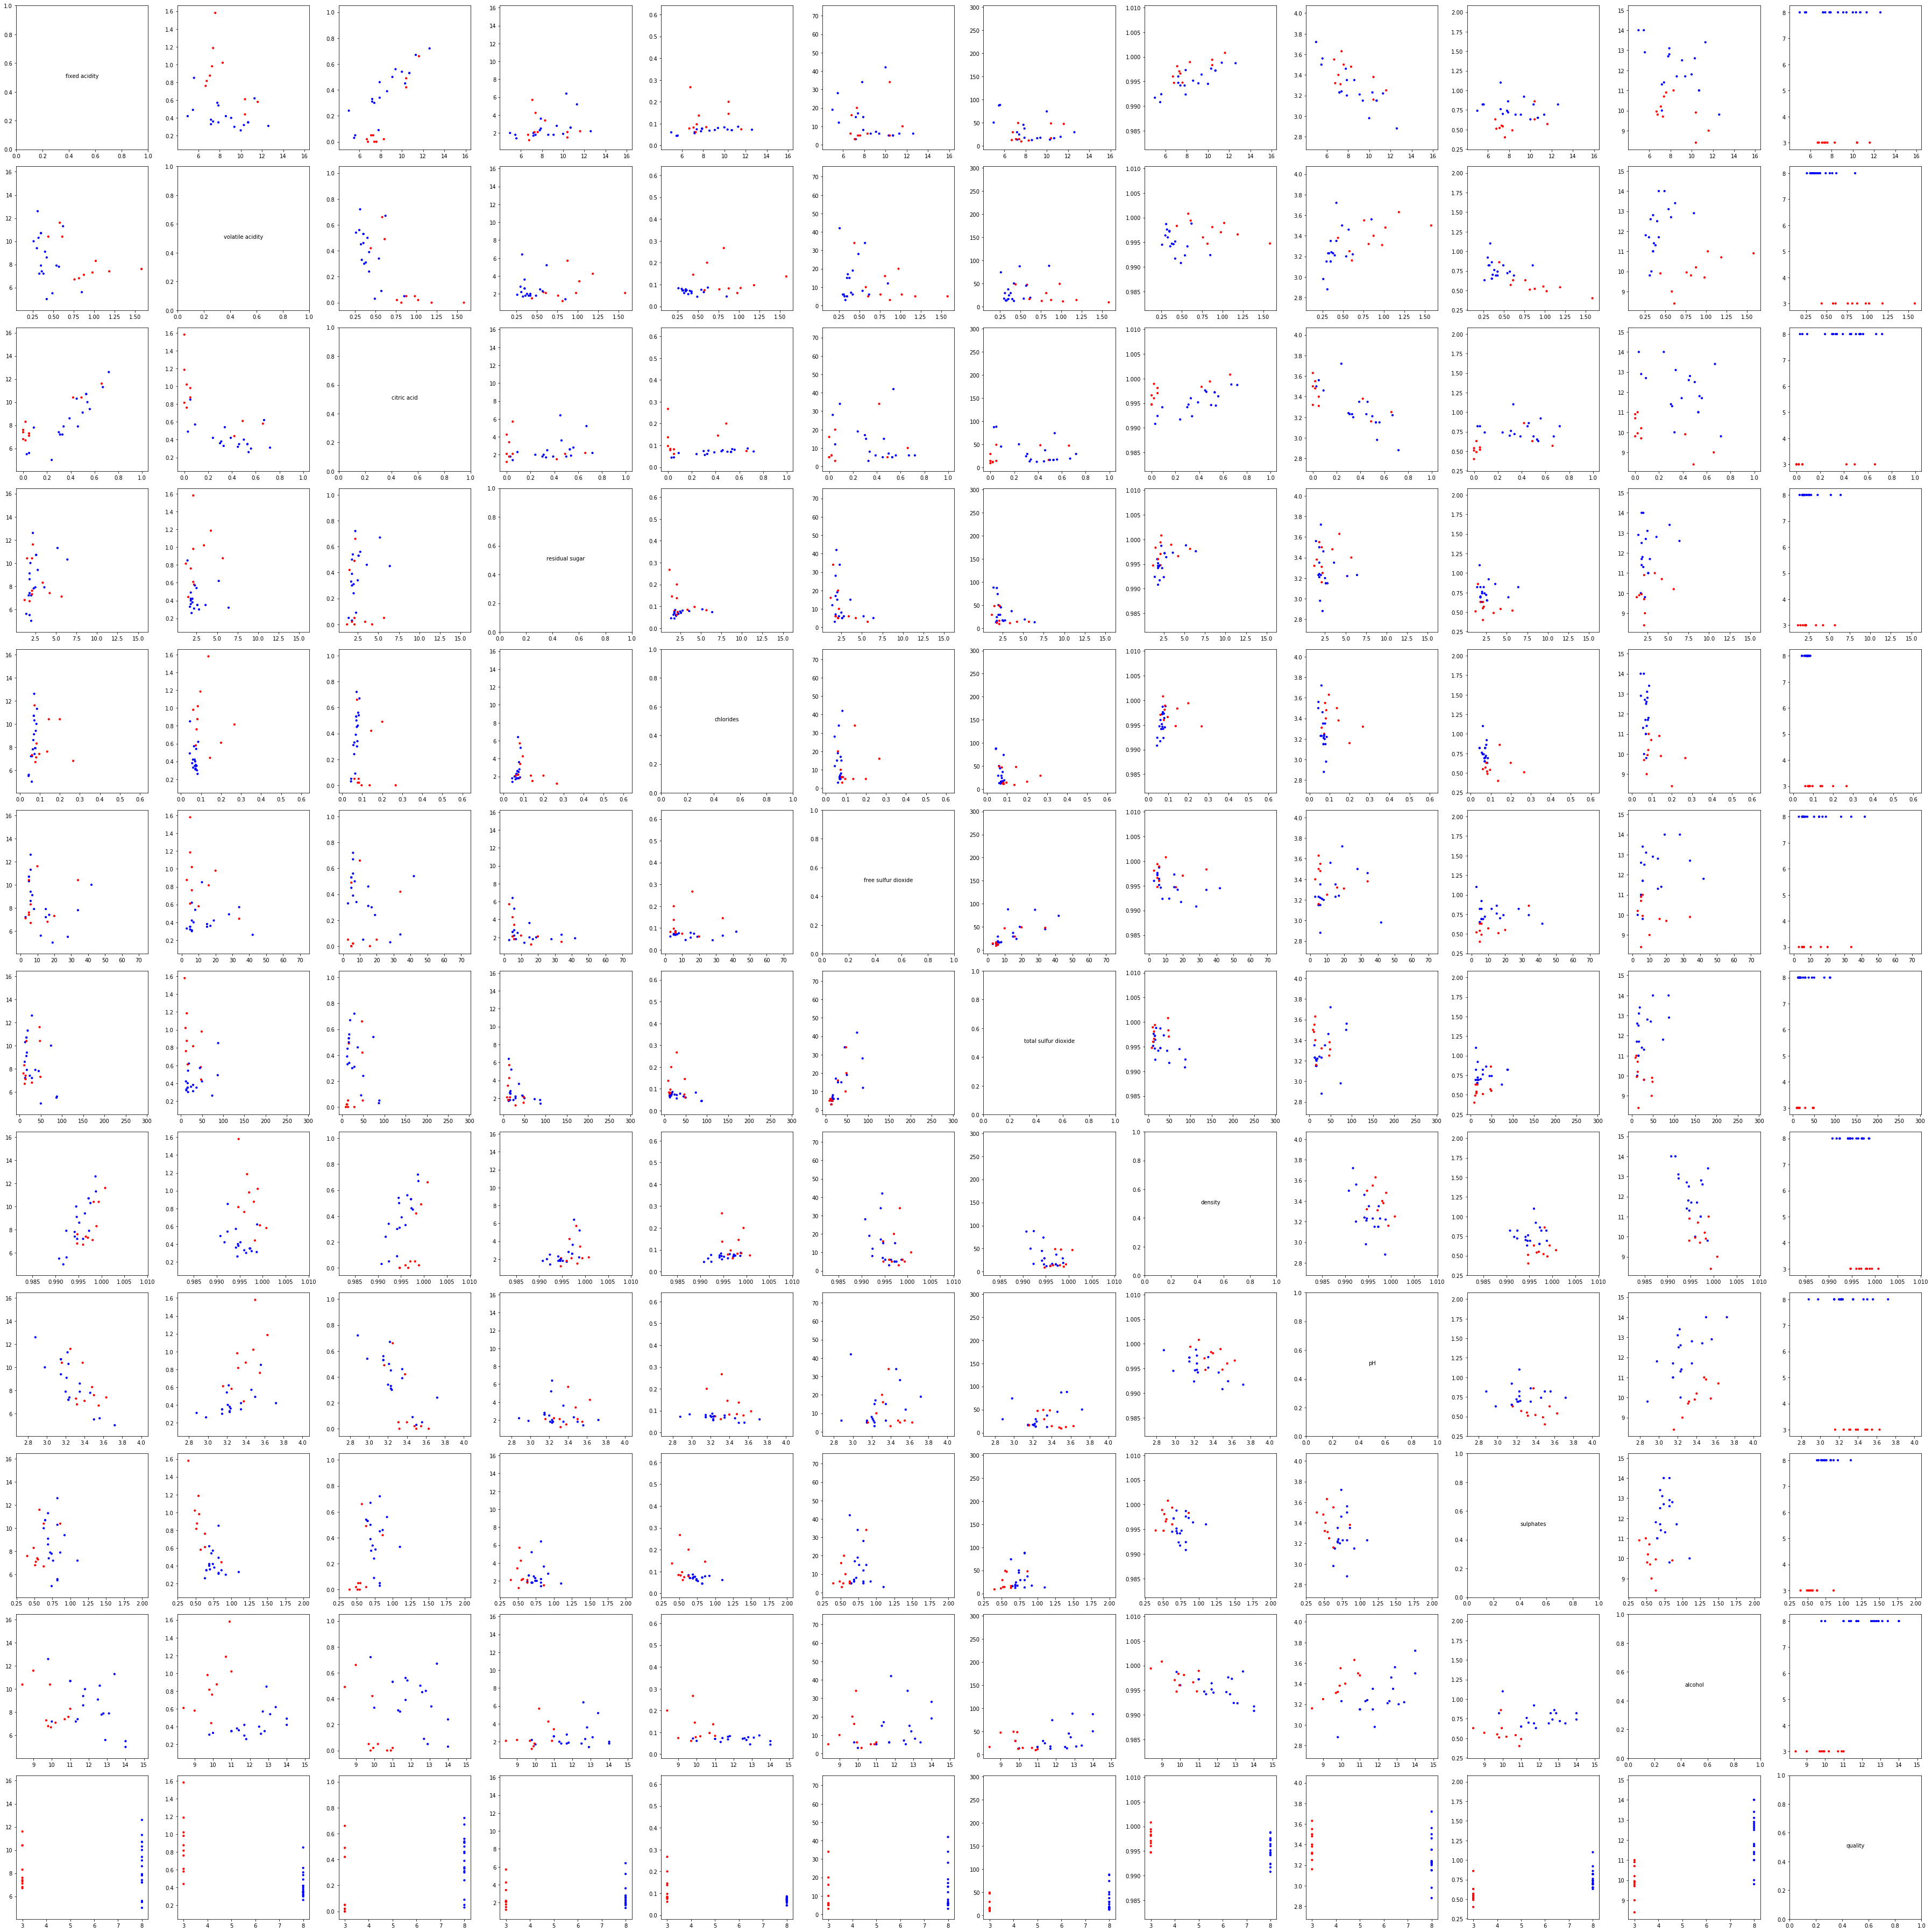

In [340]:
def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot):
    df = pd.read_csv(wine_data, sep=';')
    numvars, numdata = df.shape
    fig, axes = plt.subplots(numdata, numdata, figsize=(50,50))
    for i in range(numdata):
        for j in range(numdata):
            if i == j:
                axes[i, j].text(0.5, 0.5, df.columns[i], ha='center')
            else:
                color = ['blue' if k >= good_threshold else 'red' for k in df['quality']]
                size = [10 if k >= good_threshold else 10 if k <= bad_threshold else 0 for k in df['quality']]
                axes[i,j].scatter(df[df.columns[i]], df[df.columns[j]], c = color, s = size)
    if save_plot==True:
        plt.savefig('./winedata.png')
    plt.tight_layout()
    fig

plot_scatter_matrix('winequality-red.csv', 8, 3, save_plot=False)

### b) the most useful factor for distinguishing high vs. low quality wine and why?
#### pH values and alcohol values seems the best factors to distinguish high and low quality wine because the scatter graph of the factors has distinguishable region of good wine and bad wine.


# V.2 Learning to perceptron
### a) & b) implement a perceptron

In [348]:
class perceptron():
    def __init__(self, thresholds=0.0, eta=0.01, n_iter=14000):
        self.thresholds = thresholds
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = []
        result_ = []
        num_epoch = 0
        for i in range(1 + X.shape[1]):
            random.seed(0)
            self.w_.append(random.random())
        self.errors_ = []
        if (self.n_iter != 0):
            for _ in range(self.n_iter):
                errors = 0
                result = 0
                num_epoch += 1
                for xi, target in zip(X, y):
                    update = self.eta * (int(target) - self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += int(update != 0.0)
                    result = (num_epoch, errors, self.w_[1:], self.w_[0])
                self.errors_.append(errors)
                result_.append(result)
                
        else:
            while (1):
                errors = 0
                result = 0
                num_epoch += 1
                for xi, target in zip(X, y):
                    update = self.eta * (int(target) - self.predict(xi))
                    self.w_[1:] += update * xi
                    self.w_[0] += update
                    errors += int(update != 0.0)
                    result = (num_epoch, errors, self.w_[1:], self.w_[0])
                self.errors_.append(errors)
                result_.append(result)
                if (errors == 0):
                    break
                
                
                #print(self.w_)
        
        return result_
    def net_input(self, X):
        activation = self.w_[0]
        for i in range(len(X)):
            activation += self.w_[i + 1] * X[i]
        return activation
    def predict(self, X):
        if self.net_input(X) > self.thresholds:
            return 1
        else:
            return -1
            
p = perceptron(eta=0.01, n_iter=0)


### c) function that will take the output of perceptron training function and generate two plots in one figure

In [349]:
def maxmin(X):
    xmaxVal = 0
    xminVal = X[0][0]
    ymaxVal = 0
    yminVal = X[0][1]
    for i in X:
        xmaxVal = max(xmaxVal, i[0])
        xminVal = min(xminVal, i[0])
        ymaxVal = max(ymaxVal, i[1])
        yminVal = min(yminVal, i[1])
    return xmaxVal + 1, xminVal - 1, ymaxVal + 1, yminVal - 1

def winequality(x, good_thresh, bad_thresh):
    good1 = []
    good2 = []
    bad1 = []
    bad2 = []
    goodwine = x[(x.quality >= good_thresh)].values
    badwine = x[(x.quality <= bad_thresh)].values
    for i in range(len(goodwine)):
        good1.append(goodwine[i][0])
        good2.append(goodwine[i][1])
    for i in range(len(badwine)):
        bad1.append(badwine[i][0])
        bad2.append(badwine[i][1])
    return good1, good2, bad1, bad2

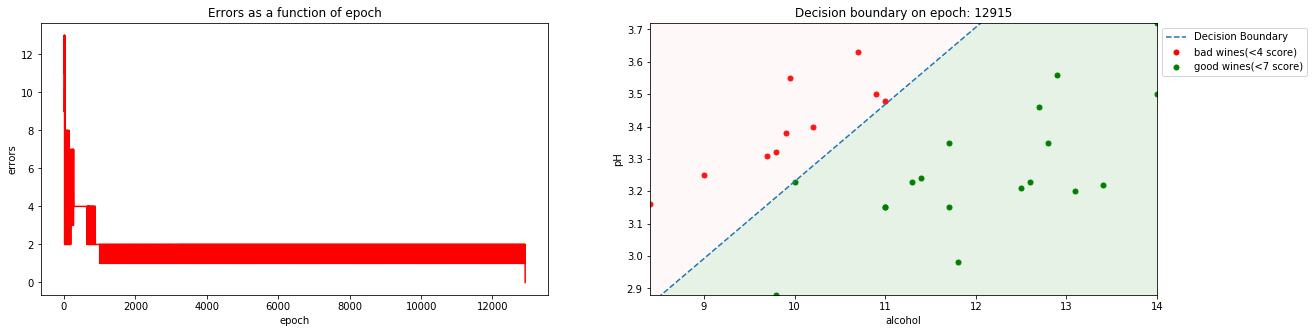

In [350]:
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    df = pd.read_csv(wine_data, sep=';')
    df_filtered = df[(df.quality >= good_thresh) | (df.quality <= bad_thresh)]
    df_data = df_filtered[['alcohol', 'pH', 'quality']]
    good1, good2, bad1, bad2 = winequality(df_data, good_thresh, bad_thresh)
    y = ['1' if k >= good_thresh else '-1' for k in df_data['quality']]
    X = df_data[['alcohol', 'pH']].values
    data = p.fit(X, y)
    plt.figure(figsize=(20,5))
    numvar = X.shape[0]
    x1_ = []
    y1_ = []
    x2_ = []
    y2_ = []
    xmaxVal, xminVal, ymaxVal, yminVal = maxmin(X)
    for i in data:
        x1 = i[0]
        y1 = i[1]
        x1_.append(x1)
        y1_.append(y1)
    if epoch > 0:
        for i in data:
            x2_ = range(int(xminVal), int(xmaxVal) + 1)
            if i[0] == epoch:
                for x2i in x2_:
                    y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
                    y2_.append(y2)
    else:
        epoch = i[0]
        #i = data[p.n_iter - 1]
        x2_ = range(int(xminVal), int(xmaxVal))
        for x2i in x2_:
            y2 = (-(i[3] / i[2][1]) / (i[3] / i[2][0])) * x2i + (-i[3] / i[2][1])
            y2_.append(y2)
    
    plt.subplot(121)
    plt.plot(x1_, y1_, color='red')
    plt.xlabel('epoch')
    plt.ylabel('errors')
    plt.title("Errors as a function of epoch")
    plt.subplot(122)
    plt.scatter(bad1, bad2, c = 'red', s = 25, label='bad wines(<{0} score)'.format(bad_thresh + 1))
    plt.scatter(good1, good2, c = 'green', s = 25, label='good wines(<{0} score)'.format(good_thresh - 1))
    plt.fill_between(x2_, y2_, ymaxVal, facecolor='pink', alpha=0.1)
    plt.fill_between(x2_, yminVal, y2_, facecolor='green', alpha=0.1)
    plt.plot(x2_, y2_, '--', label="Decision Boundary")
    plt.xlim([xminVal + 1, xmaxVal - 1])
    plt.ylim([yminVal + 1, ymaxVal - 1])
    plt.xlabel(df_data.columns[0])
    plt.ylabel(df_data.columns[1])
    plt.legend(bbox_to_anchor=(1., 1))
    plt.title("Decision boundary on epoch: %d"% epoch)
    plt.show()
    if save_plot==True:
        plt.savefig('./performance.png')
plot_performance(p, 'winequality-red.csv', 8, 3,)

### d) modify the red wine data to help the perceptron learn more quickly

# V.3 My fair ADALINE
### a)